In [4]:
# These are the normal libraries
import pandas as pd
import numpy as np

# This is just so that we don't get annoying warnings
import warnings
warnings.filterwarnings('ignore')

# This is the most common viz library in python
import matplotlib.pyplot as plt
%matplotlib inline

# This one is the above on steroids
import seaborn as sns

# This is for predictions
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# These Libs are for stats -> this ones are for description
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Cleaning operations

In [5]:
# Cleaning operations

fifa_df = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/Project_01/Project_01_FIFA - MoneyBall/Project_01_FIFA_MoneyBall/FIFA_TRAIN_DATA.CSV',sep = '?')

# Standardizing the columns

cols = []
for i in range(len(fifa_df.columns)):
    cols.append(fifa_df.columns[i].lower().replace(' ', '_')) 
fifa_df.columns = cols

# Resetting index

fifa_df = fifa_df.reset_index(drop = True)

# Looking at the shape of the df

fifa_df.head(20)

fifa_df.shape # rows = 13700 columns = 107

pd.set_option('display.max_columns', None)# This displays every column
pd.set_option('display.max_rows', False)
# First columns to be dropped

drop_cols = ['unnamed:_0','id','player_photo', 'club_logo', 'flag_photo', 'loan_date_end','gender','pot','bov'] 

fifa_df = fifa_df.drop(drop_cols, axis = 1) # First columns dropped

fifa_df.columns[fifa_df.isna().any()].tolist()

# Dropping more columns -> Wage, Release Clause. In our model we are more interested in Value column.

fifa_df = fifa_df.drop(['wage','release_clause'], axis = 1)


fifa_df



,name,age,ova,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,Luis García,37,71,Spain,KAS Eupen,CM,CM CAM CDM,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",€600K,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
1,J. Cole,33,71,England,Coventry City,CAM,CAM RM RW LM,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",€1.1M,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
2,Iniesta,36,81,Spain,Vissel Kobe,CAM,CM CAM,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",€5.5M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3
3,E. Belözoğlu,38,77,Turkey,Fenerbahçe SK,CM,CM CDM,Fenerbahçe SK 2019 ~ 2020,"5'7""",159lbs,Left,0,"Jul 2, 2019",€2.8M,2019 ~ 2020,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4 ★,4★,Medium,Medium,2 ★,44,71,83,77,62,66,7,66+2,66+2,66+2,72+0,72+0,72+0,72+0,72+0,75+2,75+2,75+2,72+2,76+1,76+1,76+1,72+2,66+2,72+2,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2
4,R. Giggs,39,78,Wales,Manchester United,CAM,LM CM CAM,Manchester United 1990 ~ 2014,"5'10""",157lbs,Left,0,"Dec 1, 1990",€1K,1990 ~ 2014,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,NaN,120,26,43,51.0,32,10,5,7,5,5,1939,392,2 ★,3★,Medium,Medium,3 ★,60,72,85,77,41,57,9,71+1,71+1,71+1,78+0,74+1,74+1,74+1,78+0,78+0,78+0,78+0,77+1,73+1,73+1,73+1,77+1,62+1,63+1,63+1,63+1,62+1,57+1,53+1,53+1,53+1,57+1,11+1
5,P. Scholes,37,80,England,Manchester United,CAM,CM CDM,Manchester United 1993 ~ 2013,"5'7""",157lbs,Right,0,"Jul 8, 1993",€400K,1993 ~ 2013,394,83,65,72,89,85.0,393,75,74.0,67,90,87,338,53,53,68.0,82,82.0,333,88,64.0,34,63,84,417,87,79.0,83.0,91.0,77,NaN,143,58,49,36.0,47,7,12,5,15,8,2065,415,3 ★,3★,Medium,Medium,2 ★,53,76,87,79,59,61,7,75+0,75+0,75+0,78+0,79+0,79+0,79+0,78+0,82+-2,82+-2,82+-2,78+0,80+0,80+0,80+0,78+0,67+0,75+0,75+0,75+0,67+0,64+0,64+0,64+0,64+0,64+0,15+0
6,P. Neville,35,74,England,Everton,CB,CDM CM RB,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",€120K,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,NaN,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0
7,D. Beckham,37,78,Eng

In [6]:
# We will try with a sample of the top 300 players filtered by Overall Ability, and will check if the null values have impact on the dataframe

fifa_best_300 = fifa_df.sort_values(by='ova', ascending=False)

fifa_best_300 = fifa_best_300.head(300)


## Handling null values

In [7]:
# Checking for null values

fifa_best_300.isnull().sum().sum()

# This code shows in which columns the nan values are

fifa_best_300.columns[fifa_df.isna().any()].tolist()

selected_nan_columns = ['club', 'position', 'joined', 'volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions', 'positioning', 'vision', 'composure', 'sliding_tackle', 'a/w', 'd/w']


# Filter the DataFrame to get the rows with NaN values in the selected columns

nan_rows = fifa_best_300[selected_nan_columns].isna().any(axis=1)

rows_with_nan = fifa_best_300[nan_rows] # Dataframe with nan rows
    
rows_with_nan.shape # 12 nan rows

# Since 12 is egual to the 4 % of our Df we decided to drop them

# Dropping them

fifa_best_300 = fifa_best_300.dropna()


In [8]:
# Create a new df that shows the categorical columns

categorical_fifa = fifa_best_300.select_dtypes(include = object)

categorical_fifa # Our categorical df

# Some categorical columns can be easily converted to numeric

,name,nationality,club,bp,position,team_&_contract,height,weight,foot,joined,value,contract,w/f,sm,a/w,d/w,ir,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
602,L. Messi,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,"Jul 1, 2004",€67.5M,2004 ~ 2021,4 ★,4★,Medium,Low,5 ★,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
111,Cristiano Ronaldo,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,"Jul 10, 2018",€46M,2018 ~ 2022,4 ★,5★,High,Low,5 ★,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
1845,R. Lewandowski,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,"Jul 1, 2014",€80M,2014 ~ 2023,4 ★,4★,High,Medium,4 ★,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2946,J. Oblak,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,"6'2""",192lbs,Right,"Jul 16, 2014",€75M,2014 ~ 2023,3 ★,1★,Medium,Medium,3 ★,220,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,89+3
2138,Neymar Jr,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,"Aug 3, 2017",€90M,2017 ~ 2022,5 ★,5★,High,Medium,5 ★,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
2314,K. De Bruyne,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,"Aug 30, 2015",€87M,2015 ~ 2023,5 ★,4★,High,High,4 ★,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
2254,M. ter Stegen,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,"6'2""",187lbs,Right,"Jul 1, 2014",€69.5M,2014 ~ 2022,4 ★,1★,Medium,Medium,3 ★,213,35+3,35+3,35+3,34+0,38+0,38+0,38+0,34+0,42+3,42+3,42+3,39+3,45+3,45+3,45+3,39+3,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3,88+3
4104,M. Salah,Egypt,Liverpool,RW,RW,Liverpool 2017 ~ 2023,"5'9""",157lbs,Left,"Jul 1, 2017",€78M,2017 ~ 2023,3 ★,4★,High,Medium,3 ★,382,85+3,85+3,85+3,88+0,88+0,88+0,88+0,88+0,88+2,88+2,88+2,87+3,82+3,82+3,82+3,87+3,71+3,68+3,68+3,68+3,71+3,67+3,58+3,58+3,58+3,67+3,22+3
4636,Alisson,Brazil,Liverpool,GK,GK,Liverpool 2018 ~ 2024,"6'3""",201lbs,Right,"Jul 19, 2018",€62.5M,2018 ~ 2024,3 ★,1★,Medium,Medium,3 ★,228,36+3,36+3,36+3,35+0,38+0,38+0,38+0,35+0,40+3,40+3,40+3,38+3,40+3,40+3,40+3,38+3,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3,88+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
# Converting categorical columns to numerical

# 1. FIFA OUTFIELD  ATTRIBUTES. We chose to round the skill values: Example -> 63 + 1 = 63

to_numeric = ['ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk']

fifa_best_300[to_numeric] = fifa_best_300[to_numeric].astype(str) # Converting the object type to string

fifa_best_300[to_numeric] = fifa_best_300[to_numeric].apply(lambda x: x.str.split('+').str[0].astype(int)) # The .apply() method in Pandas is used to apply a function to each element of a Series or DataFrame


# 2. HITS COLUMN. If K is present it means that the value is in thousand -> 6.3K = 6300

def k_to_numeric(value):
    
    '''This function convert the thousand values to numeric.
    If 'K' is found, it cut out the letter 'K' and multiplies the value * 1000
    
    '''
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    return float(value)

fifa_best_300['hits'] = fifa_best_300['hits'].apply(k_to_numeric) # Apply the function to the 'Value' column

fifa_best_300['hits'].unique()

# 3. HEIGHT COLUMN. From feet and inches to cm

fifa_best_300['height'] = fifa_best_300['height'].astype(str) # Converting the object type to string


def convert_height_to_cm(height_str):
    
    '''This function convert the height column from feet ancd inches system to cm'''
    
    height_str = height_str.replace('"', '')  # Remove double quotes
    feet, inches = height_str.split("'") # Split the values in two part, one before and one after the -> " ' "
    total_cm = int(feet) * 30.48 + int(inches) * 2.54 # First part is in feet, the second in inches
    return total_cm # Return the value in cm

fifa_best_300['height_cm'] = fifa_best_300['height'].apply(convert_height_to_cm) # Apply the function to the 'height' column and create a new 'height_cm' column

fifa_best_300['height_cm'].unique # Successfully converted

fifa_best_300 = fifa_best_300.drop('height', axis=1) # Dropping feet and inches column

# 4. WEIGHT COLUMN. From string to numeric

fifa_best_300['weight'] = fifa_best_300['weight'].astype(str) # Converting the object type to string

fifa_best_300['weight'] = fifa_best_300['weight'].str.replace('lbs', '').astype(float)

# 5. VALUE COLUMN. Creating a new column with values in eur

fifa_best_300['value'] = fifa_best_300['value'].astype(str) # Converting the object type to string

def eur_to_numeric(value):
    '''This function converts the currency values to numeric.
    If 'K' is found, it removes the letter 'K' and multiplies the value by 1000.
    If 'M' is found, it removes the letter 'M' and multiplies the value by 1,000,000.
    If neither 'K' nor 'M' is found, it treats the value as a float.
    '''
    value = value.replace('€', '')

    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    else:
        return float(value)
fifa_best_300['value'] = fifa_best_300['value'].apply(eur_to_numeric) # creating a new column calling the eur to num function

# 6. W/F,SM,IR COLUMNS. Converting ranking values to numeric.

# “W/F” stands for “Weak Foot”, “SM” stands for “Skill Moves,” and “IR” stands for “International Reputation.”

to_convert = ['w/f','sm','ir']

fifa_best_300[to_convert]= fifa_best_300[to_convert].astype(str) # Converting the object type to string

for column in to_convert:
    fifa_best_300[column] = fifa_best_300[column].str.replace('★', '').astype(int)

fifa_best_300 # Successfully converted to numeric

,name,age,ova,nationality,club,bp,position,team_&_contract,weight,foot,growth,joined,value,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm
602,L. Messi,33,93,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,159.0,Left,0,"Jul 1, 2004",67500000.0,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,830.0,89,89,89,92,93,93,93,92,93,93,93,91,87,87,87,91,66,65,65,65,66,62,52,52,52,62,19,170.18
111,Cristiano Ronaldo,35,92,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,183.0,Right,0,"Jul 10, 2018",46000000.0,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,750.0,91,91,91,89,91,91,91,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,54,54,54,61,20,187.96
1845,R. Lewandowski,31,91,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,176.0,Right,0,"Jul 1, 2014",80000000.0,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4,4,High,Medium,4,78,91,78,85,43,82,487.0,89,89,89,85,87,87,87,85,85,85,85,83,79,79,79,83,64,65,65,65,64,61,60,60,60,61,19,182.88
2946,J. Oblak,27,91,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,192.0,Right,2,"Jul 16, 2014",75000000.0,2014 ~ 2023,95,13,11,15,43,13.0,109,12,13.0,14,40,30,307,43,60,67.0,88,49.0,268,59,78.0,41,78,12,140,34,19.0,11.0,65.0,11,68.0,57,27,12,18.0,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,220.0,33,33,33,32,35,35,35,32,38,38,38,35,38,38,38,35,32,36,36,36,32,32,33,33,33,32,89,187.96
2138,Neymar Jr,28,91,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,150.0,Right,0,"Aug 3, 2017",90000000.0,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,546.0,84,84,84,90,89,89,89,90,90,90,90,90,83,83,83,90,67,62,62,62,67,62,49,49,49,62,20,175.26
2314,K. De Bruyne,29,91,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,154.0,Right,0,"Aug 30, 2015",87000000.0,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,406.0,83,83,83,88,88,88,88,88,89,89,89,89,89,89,89,89,79,80,80,80,79,75,69,69,69,75,21,180.34
2254,M. ter Stegen,28,90,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,187.0,Right,3,"Jul 1, 2014",69500000.0,2014 ~ 2022,118,18,14,11,61,14.0,144,21,18.0,12,63,30,254,38,50,37.0,86,43.0,268,66,79.0,35,78,10,171,43,22.0,11.0,70.0,25,70.0,48,25,13,10.0,439,88,85,88,88,90,1442,484,4,1,Medium,Medium,3,88,85,88,90,45,88,213.0,35,35,35,34,38,38,38,34,42,42,42,39,45,45,45,39,33,41,41,41,33,31,33,33,33,31,88,187.96
4104,M. Salah,28,90,Egypt,Liverpool,RW,RW,Liverpool 2017 ~ 2023,157.0,Left,0,"Jul 1, 2017",78000000.0,2017 ~ 2023,392,79,91,59,84,79.0,406,90,83.0,69,75,89,460,94,92,91.0,92,91.0,393,80,69.0,85,75,84,376,63,55.0,91.0,84.0,83,90.0,122,38,43,41.0,62,14,14,9,11,14,2211,470,3,4,High,Medium,3,93,86,81,90,45,75,382.0,85,85,85,88,88,88,88,88,88,88,88,87,82,82,

In [10]:
# Update the categorical df

categorical_fifa = fifa_best_300.select_dtypes(include = object)


for column in categorical_fifa.columns:
    print(f'The "{column}" column is categorical ')
    
categorical_fifa

# Foot column can be encoded with One Hot Encoding, as well as a/w and d/w (3 unique values each).

# A/W stands for attacking workrate/ D/F for defending workrate
 

The "name" column is categorical 
The "nationality" column is categorical 
The "club" column is categorical 
The "bp" column is categorical 
The "position" column is categorical 
The "team_&_contract" column is categorical 
The "foot" column is categorical 
The "joined" column is categorical 
The "contract" column is categorical 
The "a/w" column is categorical 
The "d/w" column is categorical 


,name,nationality,club,bp,position,team_&_contract,foot,joined,contract,a/w,d/w
602,L. Messi,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,Left,"Jul 1, 2004",2004 ~ 2021,Medium,Low
111,Cristiano Ronaldo,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,Right,"Jul 10, 2018",2018 ~ 2022,High,Low
1845,R. Lewandowski,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,Right,"Jul 1, 2014",2014 ~ 2023,High,Medium
2946,J. Oblak,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,Right,"Jul 16, 2014",2014 ~ 2023,Medium,Medium
2138,Neymar Jr,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,Right,"Aug 3, 2017",2017 ~ 2022,High,Medium
2314,K. De Bruyne,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,Right,"Aug 30, 2015",2015 ~ 2023,High,High
2254,M. ter Stegen,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,Right,"Jul 1, 2014",2014 ~ 2022,Medium,Medium
4104,M. Salah,Egypt,Liverpool,RW,RW,Liverpool 2017 ~ 2023,Left,"Jul 1, 2017",2017 ~ 2023,High,Medium
4636,Alisson,Brazil,Liverpool,GK,GK,Liverpool 2018 ~ 2024,Right,"Jul 19, 2018",2018 ~ 2024,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...


In [11]:

# One Hot Encoding over 'foot' 'a/w' 'd/w'

categ_to_encode = ['foot','a/w', 'd/w']


fifa_best_300[categ_to_encode]= fifa_best_300[categ_to_encode].astype(str) # Converting the object type to string



fifa_dummies = pd.get_dummies(categorical_fifa, columns = categ_to_encode, drop_first = False)


fifa_dummies = fifa_dummies.reset_index(drop = True) # Categorical DataFrame with dummies

fifa_dummies # Now the three categorical columns are encoded


,name,nationality,club,bp,position,team_&_contract,joined,contract,foot_Left,foot_Right,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,L. Messi,Argentina,FC Barcelona,RW,RW ST CF,FC Barcelona 2004 ~ 2021,"Jul 1, 2004",2004 ~ 2021,1,0,0,0,1,0,1,0
1,Cristiano Ronaldo,Portugal,Juventus,ST,ST LW,Juventus 2018 ~ 2022,"Jul 10, 2018",2018 ~ 2022,0,1,1,0,0,0,1,0
2,R. Lewandowski,Poland,FC Bayern München,ST,ST,FC Bayern München 2014 ~ 2023,"Jul 1, 2014",2014 ~ 2023,0,1,1,0,0,0,0,1
3,J. Oblak,Slovenia,Atlético Madrid,GK,GK,Atlético Madrid 2014 ~ 2023,"Jul 16, 2014",2014 ~ 2023,0,1,0,0,1,0,0,1
4,Neymar Jr,Brazil,Paris Saint-Germain,LW,LW CAM,Paris Saint-Germain 2017 ~ 2022,"Aug 3, 2017",2017 ~ 2022,0,1,1,0,0,0,0,1
5,K. De Bruyne,Belgium,Manchester City,CAM,CAM CM,Manchester City 2015 ~ 2023,"Aug 30, 2015",2015 ~ 2023,0,1,1,0,0,1,0,0
6,M. ter Stegen,Germany,FC Barcelona,GK,GK,FC Barcelona 2014 ~ 2022,"Jul 1, 2014",2014 ~ 2022,0,1,0,0,1,0,0,1
7,M. Salah,Egypt,Liverpool,RW,RW,Liverpool 2017 ~ 2023,"Jul 1, 2017",2017 ~ 2023,1,0,1,0,0,0,0,1
8,Alisson,Brazil,Liverpool,GK,GK,Liverpool 2018 ~ 2024,"Jul 19, 2018",2018 ~ 2024,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [12]:
# Create a numerical dataframe

numerical_fifa = fifa_best_300.select_dtypes(include = np.number)

numerical_fifa.head(10)



# Looking at the FIFA web page we have discovered that some skill columns, are basically the sum of individual skills that are found in other columns.

# Example -> attacking = 337 -> crossing (68) + finishing (64) + heading_accuracy (61) + short_passing (76) + volleys (68) = attacking column (337)

# The same logic also applies to -> skill, movement, power, mentality, defending, goalkeeping

# We decided to drop the individual skill columns and keep only the total skill columns

# We will keep the total skill columns.
 
skill_to_drop = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
                'dribbling', 'curve', 'fk_accuracy', 'long_passing','ball_control',
                'acceleration', 'sprint_speed', 'agility','reactions', 'balance',
                'aggression', 'interceptions','positioning', 'vision', 'penalties', 'composure',
                'shot_power', 'jumping', 'stamina','strength', 'long_shots',
                'marking', 'standing_tackle', 'sliding_tackle',
                'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                'gk_reflexes']

numerical_fifa_grouped = numerical_fifa.drop(skill_to_drop, axis = 1) # Here we changed the df that will be implent into the model!!

numerical_fifa_grouped.rename(columns={'w/f': 'weak_foot', 'sm': 'skill_moves', # renaming some columns for better understanding
                                       'ir':'international_reputation'}, inplace=True)

In [13]:
# There are other columns that could be grouped. Through an internet search I discovered the following:

'''
LS - ST - RS: These positions are related to the attacking positions in football (soccer). They stand for Left Striker (LS), Striker (ST), and Right Striker (RS). The number associated with each position represents the player's rating for that particular position. So, for example, a player with a rating of 68 for ST means that their ability to play as a Striker is rated as 68.

LW - LF - CF - RF - RW: These positions are also attacking positions, but they are typically associated with the wider areas of the field. They stand for Left Winger (LW), Left Forward (LF), Center Forward (CF), Right Forward (RF), and Right Winger (RW). The associated numbers represent the player's ratings for these positions.

LAM - CAM - RAM: These positions are for attacking midfielders. They stand for Left Attacking Midfield (LAM), Center Attacking Midfield (CAM), and Right Attacking Midfield (RAM). The numbers indicate the player's ratings for these positions.

LM - LCM - CM - RCM - RM: These positions represent various midfield roles. They stand for Left Midfield (LM), Left Center Midfield (LCM), Center Midfield (CM), Right Center Midfield (RCM), and Right Midfield (RM). The numbers are the player's ratings for these midfield positions.

LWB - LDM - CDM - RDM - RWB: These positions are for defensive and wing-back roles. They stand for Left Wing-Back (LWB), Left Defensive Midfield (LDM), Center Defensive Midfield (CDM), Right Defensive Midfield (RDM), and Right Wing-Back (RWB). The associated numbers represent player ratings for these positions.

LB - LCB - CB - RCB - RB: These positions are for defenders. They stand for Left Back (LB), Left Center Back (LCB), Center Back (CB), Right Center Back (RCB), and Right Back (RB). The numbers are player ratings for these defensive positions.

GK: This position stands for Goalkeeper (GK). The number 20 is the player's rating for the goalkeeper position.

PAC - SHO - PASS - DRI - DEF - PHY : These stand for "Outfield Player Attributes". They are abbrevations for: pace, shooting, passing, dribbling, defending, physicality

'''

# We will group them to new columns based on the means of the attributes

numerical_fifa_grouped['atk_1_mean'] = numerical_fifa_grouped[['ls','st','rs']].mean(axis = 1)
numerical_fifa_grouped['atk_2_mean'] = numerical_fifa_grouped[['lw', 'lf','cf', 'rf','rw']].mean(axis = 1)
numerical_fifa_grouped['atk_3_mean'] = numerical_fifa_grouped[['lam', 'cam', 'ram']].mean(axis = 1)
numerical_fifa_grouped['mid_mean'] = numerical_fifa_grouped[['lm', 'lcm', 'cm', 'rcm', 'rm']].mean(axis = 1)
numerical_fifa_grouped['def_1_mean'] = numerical_fifa_grouped[['lwb', 'ldm', 'cdm', 'rdm', 'rwb']].mean(axis = 1)
numerical_fifa_grouped['def_2_mean'] = numerical_fifa_grouped[['lb', 'lcb', 'cb', 'rcb', 'rb']].mean(axis = 1)
numerical_fifa_grouped['outfield_attr'] = numerical_fifa_grouped[['pac','sho','pas','dri','def','phy']].mean(axis = 1)

to_drop = ['ls','st','rs','lw', 'lf','cf', 'rf','rw',
           'lam', 'cam', 'ram','lm', 'lcm', 'cm', 'rcm', 'rm',
           'lwb', 'ldm', 'cdm', 'rdm', 'rwb','lb', 'lcb', 'cb', 'rcb', 'rb',
           'pac','sho','pas','dri','def','phy']

numerical_fifa_grouped = numerical_fifa_grouped.drop(to_drop, axis = 1)

# Now we have two (almost) clean dataframes: fifa_dummies -> categorical vars + one hot encoding | numerical_fifa_grouped -> numerical cols grouped by the means

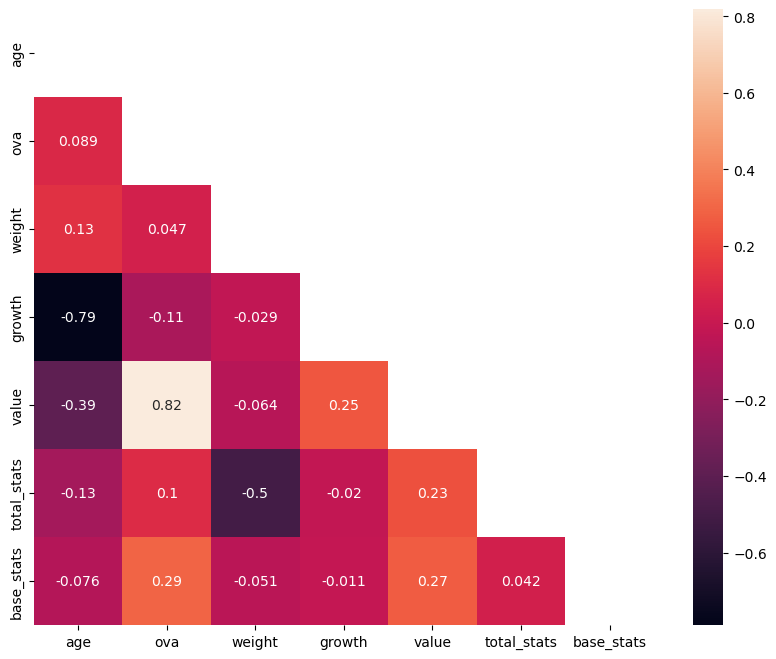

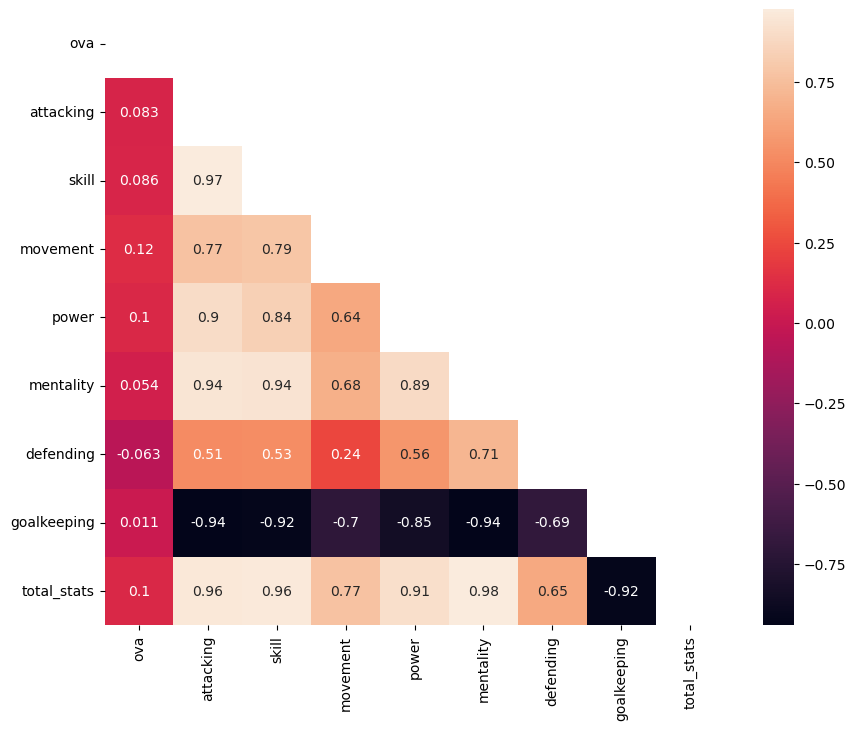

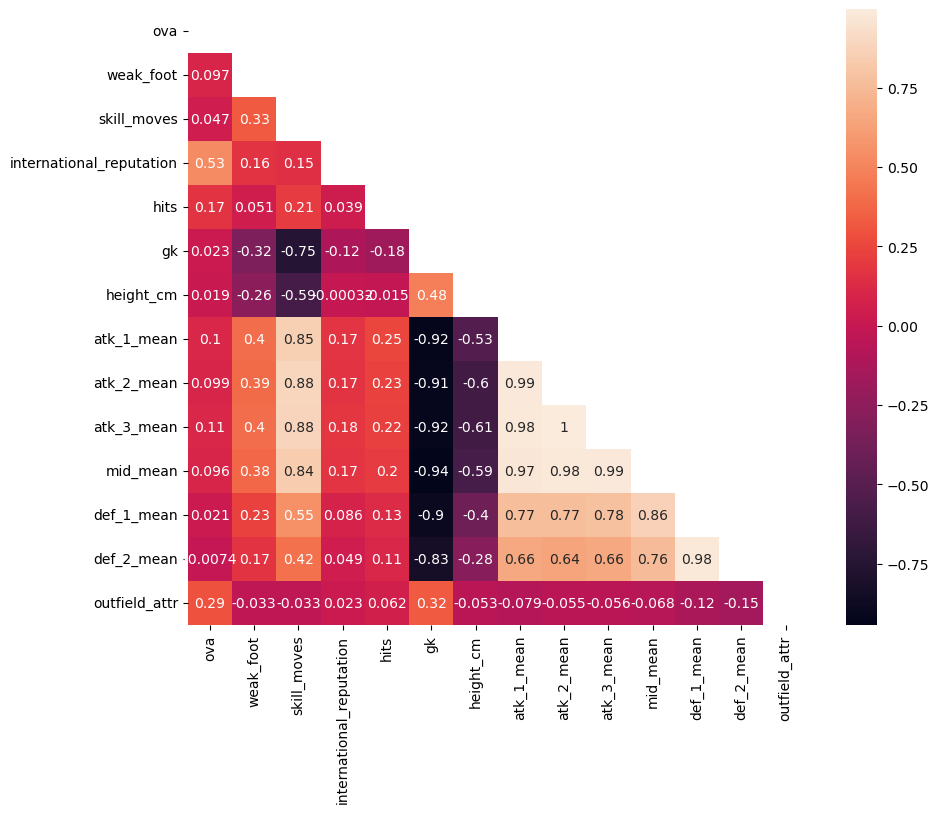

In [14]:
# Check for correlations:

# We want to see the correlations between variables. But they are too many, so will filter the database in different ways.


# We will consider an high correlation between variable when the value is equal or greater than |0.8| or equal/near 0


# 1. First correlations matrix


cols = ['age', 'ova', 'weight', 'growth', 'value','total_stats', 'base_stats']
numerical_fifa_1 = numerical_fifa_grouped[cols]


correlations_matrix = numerical_fifa_1.corr()
correlations_matrix

#sns.heatmap(correlations_matrix, annot=True)
#plt.show()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# Results: The matrix shows an high correaltion 0.84 between ova and value. But there doesn't seem any multicollinearity

# 2. Second correlations matrix

cols2 = ['ova','attacking','skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping','total_stats']

numerical_fifa_2 = numerical_fifa_grouped[cols2]


correlations_matrix = numerical_fifa_2.corr()
correlations_matrix

#sns.heatmap(correlations_matrix, annot=True)
#plt.show()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# Results: Nothing relevant to point out


# 3. Third correlations matrix

# Results: the matrix shows an high correlation between 'ova' and 'outfield_attr' -> 0.84


cols3 = ['ova', 'weak_foot', 'skill_moves',
       'international_reputation', 'hits', 'gk', 'height_cm', 'atk_1_mean',
       'atk_2_mean', 'atk_3_mean', 'mid_mean', 'def_1_mean', 'def_2_mean',
       'outfield_attr']

numerical_fifa_3 = numerical_fifa_grouped[cols3]


correlations_matrix = numerical_fifa_3.corr()
correlations_matrix

#sns.heatmap(correlations_matrix, annot=True)
#plt.show()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# Results: Nothing relevant to point out



In [15]:
# Dropping more columns

# Total_stats column is the sum of the following skills, so we drop them as well

to_drop = ['attacking','skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping']

numerical_fifa_grouped = numerical_fifa_grouped.drop(to_drop, axis = 1)

# We discovered that basic_stas and outfield_attr have the same values

numerical_fifa_grouped = numerical_fifa_grouped.drop(['outfield_attr'], axis = 1)

# We group the position attributes by their mean 

numerical_fifa_grouped['atk_att'] = numerical_fifa_grouped[['atk_1_mean','atk_2_mean','atk_3_mean']].mean(axis = 1)
numerical_fifa_grouped['def_att'] = numerical_fifa_grouped[['def_1_mean','def_2_mean']].mean(axis = 1)

to_drop = ['atk_1_mean','atk_2_mean','atk_3_mean','def_1_mean','def_2_mean']

numerical_fifa_grouped = numerical_fifa_grouped.drop(to_drop, axis = 1)

# Create column "stats_ratio" -> base over tot

numerical_fifa_grouped['ratio_stats'] = round(numerical_fifa_grouped['base_stats'] / numerical_fifa_grouped['total_stats'],2)


numerical_fifa_grouped

,age,ova,weight,growth,value,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,gk,height_cm,mid_mean,atk_att,def_att,ratio_stats
602,33,93,159.0,0,67500000.0,2231,466,4,4,5,830.0,19,170.18,88.6,91.533333,60.7,0.21
111,35,92,183.0,0,46000000.0,2221,464,4,5,5,750.0,20,187.96,83.8,89.733333,59.7,0.21
1845,31,91,176.0,0,80000000.0,2195,457,4,4,4,487.0,19,182.88,80.6,86.733333,62.5,0.21
2946,27,91,192.0,2,75000000.0,1413,489,3,1,3,220.0,89,187.96,36.8,34.933333,33.5,0.35
2138,28,91,150.0,0,90000000.0,2175,451,5,5,5,546.0,20,175.26,85.8,87.800000,59.1,0.21
2314,29,91,154.0,0,87000000.0,2304,485,5,4,4,406.0,21,180.34,89.0,86.666667,75.5,0.21
2254,28,90,187.0,3,69500000.0,1442,484,4,1,3,213.0,88,187.96,42.6,37.800000,35.0,0.34
4104,28,90,157.0,0,78000000.0,2211,470,3,4,3,382.0,22,175.26,84.0,87.000000,65.4,0.21
4636,27,90,201.0,1,62500000.0,1389,490,3,1,3,228.0,88,190.50,39.2,37.600000,31.7,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [16]:
# Our dataframes -> numerical_fifa_grouped | fifa_dummies 


# Further cleaning :

fifa_dummies = fifa_dummies.drop(['position','joined','contract','team_&_contract'], axis = 1) # we do not want them into our model

# Reset indexes

fifa_dummies = fifa_dummies.reset_index(drop = True)

numerical_fifa_grouped = numerical_fifa_grouped.reset_index(drop = True)

# Concate the two dfs

fifa_cleaned = pd.concat([numerical_fifa_grouped,fifa_dummies], axis = 1)

fifa_cleaned

,age,ova,weight,growth,value,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,gk,height_cm,mid_mean,atk_att,def_att,ratio_stats,name,nationality,club,bp,foot_Left,foot_Right,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium
0,33,93,159.0,0,67500000.0,2231,466,4,4,5,830.0,19,170.18,88.6,91.533333,60.7,0.21,L. Messi,Argentina,FC Barcelona,RW,1,0,0,0,1,0,1,0
1,35,92,183.0,0,46000000.0,2221,464,4,5,5,750.0,20,187.96,83.8,89.733333,59.7,0.21,Cristiano Ronaldo,Portugal,Juventus,ST,0,1,1,0,0,0,1,0
2,31,91,176.0,0,80000000.0,2195,457,4,4,4,487.0,19,182.88,80.6,86.733333,62.5,0.21,R. Lewandowski,Poland,FC Bayern München,ST,0,1,1,0,0,0,0,1
3,27,91,192.0,2,75000000.0,1413,489,3,1,3,220.0,89,187.96,36.8,34.933333,33.5,0.35,J. Oblak,Slovenia,Atlético Madrid,GK,0,1,0,0,1,0,0,1
4,28,91,150.0,0,90000000.0,2175,451,5,5,5,546.0,20,175.26,85.8,87.800000,59.1,0.21,Neymar Jr,Brazil,Paris Saint-Germain,LW,0,1,1,0,0,0,0,1
5,29,91,154.0,0,87000000.0,2304,485,5,4,4,406.0,21,180.34,89.0,86.666667,75.5,0.21,K. De Bruyne,Belgium,Manchester City,CAM,0,1,1,0,0,1,0,0
6,28,90,187.0,3,69500000.0,1442,484,4,1,3,213.0,88,187.96,42.6,37.800000,35.0,0.34,M. ter Stegen,Germany,FC Barcelona,GK,0,1,0,0,1,0,0,1
7,28,90,157.0,0,78000000.0,2211,470,3,4,3,382.0,22,175.26,84.0,87.000000,65.4,0.21,M. Salah,Egypt,Liverpool,RW,1,0,1,0,0,0,0,1
8,27,90,201.0,1,62500000.0,1389,490,3,1,3,228.0,88,190.50,39.2,37.600000,31.7,0.35,Alisson,Brazil,Liverpool,GK,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


# Models

# BEST MODEL -> 3°
## Third model stats:
R2 value is = 0.8832
<br>
The mean squared error of the model is = 0.63
<br>
The root mean squared error of the model is = 0.79
<br>
The mean absolute error of the model is = 0.54

In [17]:
# 1 MODEL:

# Independent variables -> 'growth','value','international_reputation', 'gk','def_att', 'age'

# X - y Split

y = fifa_cleaned['ova']
X = fifa_cleaned.drop(['ova','name','nationality','club','bp', 'height_cm','foot_Left', 'foot_Right','a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High', 'd/w_Low',
       'd/w_Medium','weak_foot','base_stats','weight','total_stats','mid_mean', 'ratio_stats', 'hits','atk_att','skill_moves'], axis = 1)

from sklearn.model_selection import train_test_split




# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% train

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test) # Here our predictions


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

# OLS model
y = y_train
X = sm.add_constant(X_train)
model = sm.OLS(y,X).fit()

model.summary()

# MULTICOLLINEARITY ISSUE WITH 'growth'


R2 value is = 0.882
The mean squared error of the model is = 0.64
The root mean squared error of the model is = 0.8
The mean absolute error of the model is = 0.55


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     313.3
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          1.14e-105
Time:                        18:04:47   Log-Likelihood:                -272.01
No. Observations:                 230   AIC:                             558.0
Df Residuals:                     223   BIC:                             582.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       67.5053      1.036     65.132      0.000      65.463      69.548
age                          0.2918      0.030      9.682      0.000       0.232       0.351
growth                       0.0493      0.041      1.202      0.231      -0.032       0.130
value                     1.547e-07   4.59e-09     33.732      0.000    1.46e-07    1.64e-07
international_reputation     0.2272      0.077      2.949      0.004       0.075       0.379
gk                           0.0292      0.004      6.778      0.000       0.021       0.038
def_att                      0.0304      0.006      5.090      0.000       0.019       0.042
==============================================================================
Omnibus:                       65.090   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.798
Skew:                           1.107   Prob(JB):                     6.96e-54
Kurtosis:                       7.544   Cond. No.                     6.35e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# 2. MODEL:

# Independent variables -> 'age', 'value','international_reputation', 'gk','def_att'

# X - y Split

y = fifa_cleaned['ova']
X = fifa_cleaned.drop(['ova','name','nationality','club','bp', 'height_cm','foot_Left', 'foot_Right','a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High', 'd/w_Low',
       'd/w_Medium','weak_foot','base_stats','weight','total_stats','mid_mean', 'ratio_stats', 'hits','atk_att','skill_moves','growth'], axis = 1)

from sklearn.model_selection import train_test_split

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% train

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test) # Here our predictions


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

# OLS model
y = y_train
X = sm.add_constant(X_train)
model = sm.OLS(y,X).fit()

model.summary()

# NO MULTICOLLINEARITY


R2 value is = 0.8832
The mean squared error of the model is = 0.63
The root mean squared error of the model is = 0.79
The mean absolute error of the model is = 0.54


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     374.9
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          1.14e-106
Time:                        18:04:47   Log-Likelihood:                -272.75
No. Observations:                 230   AIC:                             557.5
Df Residuals:                     224   BIC:                             578.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       68.3664      0.750     91.205      0.000      66.889      69.844
age                          0.2654      0.021     12.826      0.000       0.225       0.306
value                     1.538e-07   4.53e-09     33.978      0.000    1.45e-07    1.63e-07
international_reputation     0.2356      0.077      3.067      0.002       0.084       0.387
gk                           0.0292      0.004      6.771      0.000       0.021       0.038
def_att                      0.0297      0.006      4.996      0.000       0.018       0.041
==============================================================================
Omnibus:                       68.768   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.490
Skew:                           1.178   Prob(JB):                     1.22e-56
Kurtosis:                       7.617   Cond. No.                     4.59e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# 3. MODEL:

# Normalized  + Independent variables -> 'value','international_reputation', 'gk','def_att'

# X - y Split

y = fifa_cleaned['ova']
X = fifa_cleaned.drop(['ova','name','nationality','club','bp', 'height_cm','foot_Left', 'foot_Right','a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High', 'd/w_Low',
       'd/w_Medium','weak_foot','base_stats','weight','total_stats','mid_mean', 'ratio_stats', 'hits','atk_att','skill_moves','growth'], axis = 1)

from sklearn.model_selection import train_test_split

# Normalize indipendent vars

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(X)
normalized_X = pd.DataFrame(normalized_X, columns=X.columns)



# Train test split

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.20, random_state=42) # 80% train

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test) # Here our predictions


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

# OLS model
y = y_train
X = sm.add_constant(X_train)
model = sm.OLS(y,X).fit()

model.summary()

# NO MULTICOLLINEARITY!!!


R2 value is = 0.8832
The mean squared error of the model is = 0.63
The root mean squared error of the model is = 0.79
The mean absolute error of the model is = 0.54


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     374.9
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          1.14e-106
Time:                        18:04:47   Log-Likelihood:                -272.75
No. Observations:                 230   AIC:                             557.5
Df Residuals:                     224   BIC:                             578.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       74.6678      0.393    189.871      0.000      73.893      75.443
age                          6.1053      0.476     12.826      0.000       5.167       7.043
value                       13.8420      0.407     33.978      0.000      13.039      14.645
international_reputation     0.9424      0.307      3.067      0.002       0.337       1.548
gk                           2.2777      0.336      6.771      0.000       1.615       2.941
def_att                      1.8149      0.363      4.996      0.000       1.099       2.531
==============================================================================
Omnibus:                       68.768   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.490
Skew:                           1.178   Prob(JB):                     1.22e-56
Kurtosis:                       7.617   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

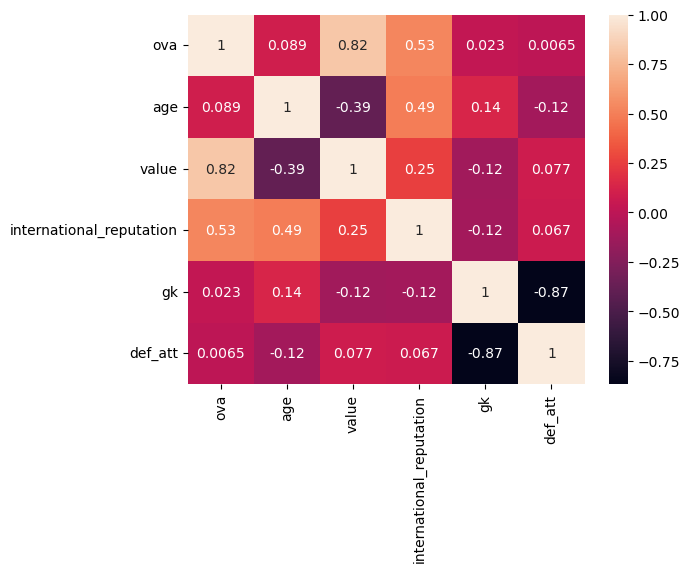

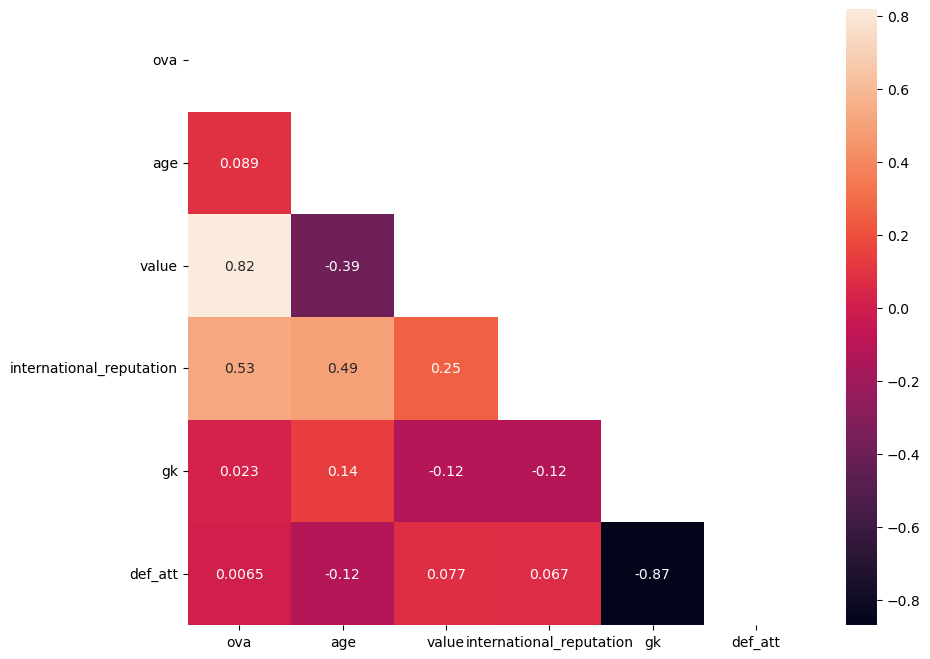

In [20]:
# Correlations matrix between variables implemented into the model


cols = ['ova', 'age', 'value','international_reputation', 'gk', 'def_att']
numerical_fifa_final = numerical_fifa_grouped[cols]


correlations_matrix = numerical_fifa_final.corr()
correlations_matrix

sns.heatmap(correlations_matrix, annot=True)
plt.show()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# The matrix confirms that there are no multicollinearity issues



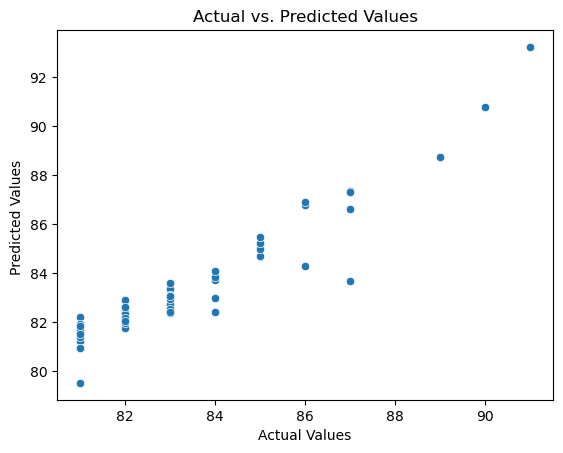

In [21]:
# Scatter plot that visualize y pred over y real

# With seaborn

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = y_test, y = y_predictions, data = y_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values ")
plt.title("Actual vs. Predicted Values")
plt.show()




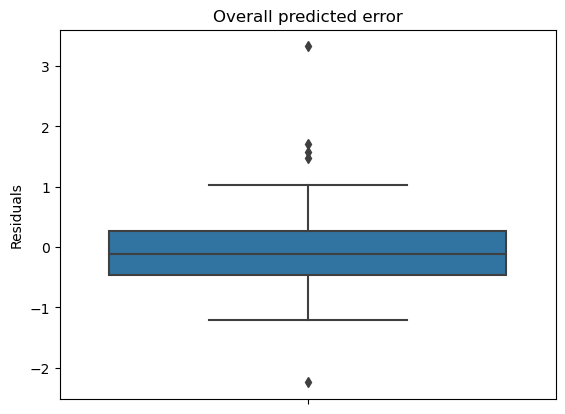

The IQR is:  0.72
Q2 is:  -0.11
Max positive error is :  3.33
Min negative error is :  -2.24


In [22]:
# Create a df that show the quality of our predictions

y_test_new_index = y_test.reset_index( drop = True) # resetting the index of the y_test

type(y_predictions) # This is not a series yet, lets convert it

predictions_series = pd.Series(y_predictions) # Predicted y converted to series


pred_vs_real = pd.DataFrame({'real_ova': y_test_new_index, 'predicted_ova': predictions_series}) # df with y pred and y real

pred_vs_real['y_error'] = pred_vs_real['real_ova']- pred_vs_real['predicted_ova']

sns.boxplot(y='y_error', data=pred_vs_real, orient="v")
plt.ylabel("Residuals")
plt.title("Overall predicted error")
plt.show()

# Description
pred_vs_real['y_error'].describe()

# Calculate the interquartile range (IQR)
q1 = np.percentile(pred_vs_real['y_error'], 25)
q3 = np.percentile(pred_vs_real['y_error'], 75)
q2 = np.percentile(pred_vs_real['y_error'], 50)
max_e = pred_vs_real['y_error'].max()
min_e = pred_vs_real['y_error'].min()

print("The IQR is: ", round((q3 - q1),2))
print("Q2 is: ", round(q2,2))
print("Max positive error is : ", round(max_e,2))
print("Min negative error is : ", round(min_e,2))


# Cleaning the test Df

In [23]:
# Importing test df

test_df = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/Project_01/Project_01_FIFA - MoneyBall/Project_01_FIFA_MoneyBall/FIFA_TEST_DATA.CSV',sep = '?')

# Standardizing the columns

cols = []
for i in range(len(test_df.columns)):
    cols.append(test_df.columns[i].lower().replace(' ', '_')) 
test_df.columns = cols

# Resetting index

test_df = test_df.reset_index(drop = True)


# First columns to be dropped

drop_cols = ['id','unnamed:_0','player_photo', 'club_logo', 'flag_photo', 'loan_date_end','gender',
            'wage','release_clause','position','joined','contract','team_&_contract']

test_df = test_df.drop(drop_cols, axis = 1) # First columns dropped

#fifa_df.columns[fifa_df.isna().any()].tolist()

# Converting categorical columns to numerical

# 1. FIFA OUTFIELD  ATTRIBUTES. We chose to round the skill values: Example -> 63 + 1 = 63

to_numeric = ['ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk']

test_df[to_numeric] = test_df[to_numeric].astype(str) # Converting the object type to string

test_df[to_numeric] = test_df[to_numeric].apply(lambda x: x.str.split('+').str[0].astype(int)) # The .apply() method in Pandas is used to apply a function to each element of a Series or DataFrame


# 2. HITS COLUMN. If K is present it means that the value is in thousand -> 6.3K = 6300

def k_to_numeric(value):
    
    '''This function convert the thousand values to numeric.
    If 'K' is found, it cut out the letter 'K' and multiplies the value * 1000
    
    '''
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    return float(value)

test_df['hits'] = test_df['hits'].apply(k_to_numeric) # Apply the function to the 'Value' column

test_df['hits'].unique()

# 3. HEIGHT COLUMN. From feet and inches to cm

test_df['height'] = test_df['height'].astype(str) # Converting the object type to string

test_df['height_cm'] = test_df['height'].apply(convert_height_to_cm) # Apply the function to the 'height' column and create a new 'height_cm' column

test_df = test_df.drop('height', axis=1) # Dropping feet and inches column

# 4. WEIGHT COLUMN. From string to numeric

test_df['weight'] = test_df['weight'].astype(str) # Converting the object type to string

test_df['weight'] = test_df['weight'].str.replace('lbs', '').astype(float)

# 5. VALUE COLUMN. Creating a new column with values in eur

# I AM NOT SURE THAT THIS IS GONNA WORK PROPERLY. FOR NOW I WON'T DELETE THE ORIGINAL COLUMN 'value'

test_df['value'] = test_df['value'].astype(str) # Converting the object type to string

test_df['value'] = test_df['value'].apply(eur_to_numeric) # creating a new column calling the eur to num function

# 6. W/F,SM,IR COLUMNS. Converting ranking values to numeric.

to_convert = ['w/f','sm','ir']

test_df[to_convert]= test_df[to_convert].astype(str) # Converting the object type to string

for column in to_convert:
    test_df[column] = test_df[column].str.replace('★', '').astype(int)

test_df['sm'].unique() # Successfully converted to numeric

#  Create Categorical test

categorical_test = test_df.select_dtypes(include = object)

# Encoding categorical

categ_to_encode = ['foot','a/w', 'd/w']


test_df[categ_to_encode]= test_df[categ_to_encode].astype(str) # Converting the object type to string


test_dummies = pd.get_dummies(categorical_test, columns = categ_to_encode, drop_first = False)


test_dummies = test_dummies.reset_index(drop = True) # Categorical DataFrame with dummies

# Create numerical

numerical_test = test_df.select_dtypes(include = np.number)

# Dropping individual skill columns.

skill_to_drop = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
                'dribbling', 'curve', 'fk_accuracy', 'long_passing','ball_control',
                'acceleration', 'sprint_speed', 'agility','reactions', 'balance',
                'aggression', 'interceptions','positioning', 'vision', 'penalties', 'composure',
                'shot_power', 'jumping', 'stamina','strength', 'long_shots',
                'marking', 'standing_tackle', 'sliding_tackle',
                'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                'gk_reflexes']
# Grouping skill position

numerical_test_grouped = numerical_test.drop(skill_to_drop, axis = 1)

numerical_test_grouped['atk_1_mean'] = numerical_test_grouped[['ls','st','rs']].mean(axis = 1)
numerical_test_grouped['atk_2_mean'] = numerical_test_grouped[['lw', 'lf','cf', 'rf','rw']].mean(axis = 1)
numerical_test_grouped['atk_3_mean'] = numerical_test_grouped[['lam', 'cam', 'ram']].mean(axis = 1)
numerical_test_grouped['mid_mean'] = numerical_test_grouped[['lm', 'lcm', 'cm', 'rcm', 'rm']].mean(axis = 1)
numerical_test_grouped['def_1_mean'] = numerical_test_grouped[['lwb', 'ldm', 'cdm', 'rdm', 'rwb']].mean(axis = 1)
numerical_test_grouped['def_2_mean'] = numerical_test_grouped[['lb', 'lcb', 'cb', 'rcb', 'rb']].mean(axis = 1)
numerical_test_grouped['outfield_attr'] = numerical_test_grouped[['pac','sho','pas','dri','def','phy']].mean(axis = 1)

to_drop = ['ls','st','rs','lw', 'lf','cf', 'rf','rw',
           'lam', 'cam', 'ram','lm', 'lcm', 'cm', 'rcm', 'rm',
           'lwb', 'ldm', 'cdm', 'rdm', 'rwb','lb', 'lcb', 'cb', 'rcb', 'rb',
           'pac','sho','pas','dri','def','phy']

numerical_test_grouped = numerical_test_grouped.drop(to_drop, axis = 1)

numerical_test_grouped.rename(columns={'w/f': 'weak_foot', 'sm': 'skill_moves', # renaming some columns for better understanding
                                       'ir':'international_reputation'}, inplace=True)

numerical_test_grouped['ratio_stats'] = round(numerical_test_grouped['base_stats'] / numerical_test_grouped['total_stats'],2)


# Dropping more columns

# Total_stats column is the some of the following skills, so we drop them as well

to_drop = ['attacking','skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping']

numerical_test_grouped = numerical_test_grouped.drop(to_drop, axis = 1)

# Basic_stas and Outfield_attr have the same values

numerical_test_grouped = numerical_test_grouped.drop(['outfield_attr'], axis = 1)

# We group the position attributes

numerical_test_grouped['atk_att'] = numerical_test_grouped[['atk_1_mean','atk_2_mean','atk_3_mean']].mean(axis = 1)
numerical_test_grouped['def_att'] = numerical_test_grouped[['def_1_mean','def_2_mean']].mean(axis = 1)

to_drop = ['atk_1_mean','atk_2_mean','atk_3_mean','def_1_mean','def_2_mean']

numerical_test_grouped = numerical_test_grouped.drop(to_drop, axis = 1)

numerical_test_grouped # GOOD SO FAR

# Reset test dfs
 
test_dummies = test_dummies.reset_index(drop = True)

numerical_test_grouped  = numerical_test_grouped.reset_index(drop = True)

# Concate the two dfs

fifa_test= pd.concat([numerical_test_grouped,test_dummies], axis = 1)




In [24]:
# Predicting test data
X = fifa_test.drop(['name','nationality','club','bp', 'height_cm','foot_Left', 'foot_Right','a/w_High', 'a/w_Low', 'a/w_Medium', 'd/w_High', 'd/w_Low',
       'd/w_Medium','weak_foot','base_stats','weight','total_stats','mid_mean', 'ratio_stats', 'hits','atk_att','skill_moves','growth'], axis = 1)
    
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X_test = scaler.fit_transform(X)
normalized_X_test = pd.DataFrame(normalized_X_test, columns=X.columns)

# Define the desired column order based on  train fifa

desired_columns = normalized_X.columns

# Reorganize the columns of test fifa to match the desired order

normalized_X_test = normalized_X_test[desired_columns] # Matching the columns

predicted_ova = lm.predict(normalized_X_test)
ova_test_predicted = pd.Series(predicted_ova).astype(int)

ova_test_predicted

0       75
1       76
2       76
3       78
4       79
5       76
6       77
7       77
8       77
9       78
10      77
11      76
        ..
3413    79
3414    76
3415    76
3416    79
3417    76
3418    82
3419    77
3420    78
3421    77
3422    76
3423    78
3424    76
Length: 3425, dtype: int64

In [25]:
# Create a new df fltered by name prediticted ova / value, and sorted by value and prediticted ova

fifa_test['pred_ova'] = ova_test_predicted # new column with predicted ova values

fifa_final = fifa_test.sort_values(by=['pred_ova', 'value'], ascending= False)

pd.set_option('display.max_rows', None) # This displays every column


selected_columns = ["name","pred_ova","value"]

filtered_fifa_final = fifa_final[selected_columns] # df filtered


filtered_fifa_final.head(20)


,name,pred_ova,value
158,K. Mbappé,91,105500000.0
494,V. van Dijk,89,75500000.0
1912,S. Mané,88,78000000.0
1385,P. Dybala,87,71000000.0
554,N. Kanté,86,51000000.0
1432,A. Robertson,85,53000000.0
992,M. Neuer,85,29000000.0
2731,F. de Jong,84,50500000.0
2129,S. Milinković-Savić,84,49000000.0
2852,M. Depay,84,48500000.0


In [26]:
print('With a budget of 100M $ we chose these players: ')

players_chosen = print(' 1. Player : M. Neuer - ova 85','\n','2. Player: L. Suárez - ova 84', '\n', '3. Player :Sergio Busquets ova - 84')




With a budget of 100M $ we chose these players: 
 1. Player : M. Neuer - ova 85 
 2. Player: L. Suárez - ova 84 
 3. Player :Sergio Busquets ova - 84


In [27]:
# Create a df with the 3 players chosen using the original uncleaned df

fifa_chosen = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/Project_01/Project_01_FIFA - MoneyBall/Project_01_FIFA_MoneyBall/FIFA_TEST_DATA.CSV',sep = '?')

fifa_chosen_att = fifa_chosen[(fifa_chosen['Name'] == 'M. Neuer') | 
                        (fifa_chosen['Name'] == 'L. Suárez') | 
                        (fifa_chosen['Name'] == 'Sergio Busquets')]

pd.set_option('display.max_rows', False)



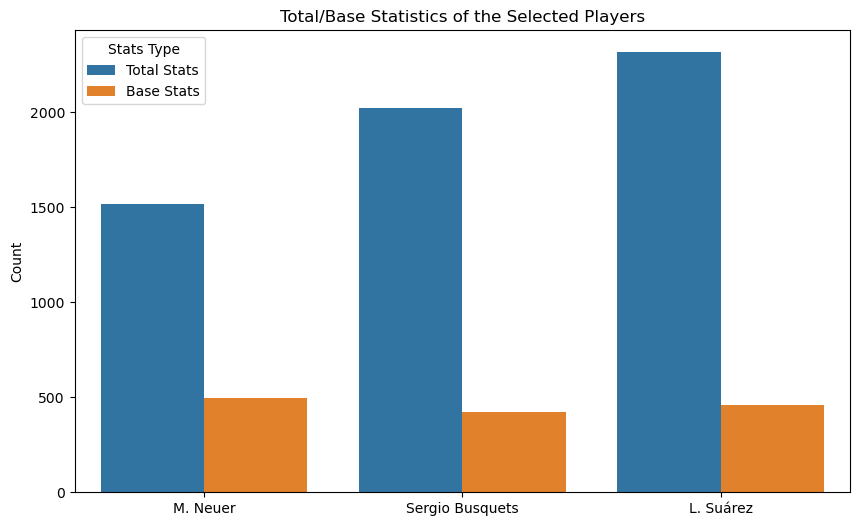

In [28]:
# Create a bar plot that shows the statistics of the players

# Reshape the data for the bar plot
players_data_melted = fifa_chosen_att.melt(id_vars='Name', value_vars=['Total Stats', 'Base Stats'],
                                        var_name='Stats Type', value_name='Value') # This code basically create a new column 'Stats Type' melting total stats/base stats column

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Value', hue='Stats Type', data=players_data_melted)

# Customize the plot
plt.title('Total/Base Statistics of the Selected Players')
plt.xlabel(None)
plt.ylabel('Count')

# Show the plot
plt.show()

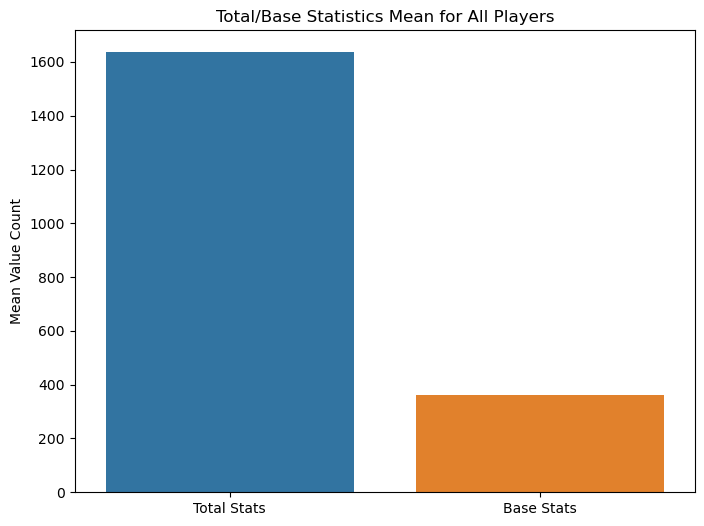

1635
361


In [29]:
# Create a graph Tota/Base stats of all players

# Calculate the mean of 'Total Stats' and 'Base Stats' for all players
total_stats_mean = fifa_test['total_stats'].mean()
base_stats_mean = fifa_test['base_stats'].mean()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=['Total Stats', 'Base Stats'], y=[total_stats_mean, base_stats_mean])

# Customize the plot
plt.title('Total/Base Statistics Mean for All Players')
plt.xlabel(None)
plt.ylabel('Mean Value Count')

# Show the plot
plt.show()

print(int(total_stats_mean))
print(int(base_stats_mean))

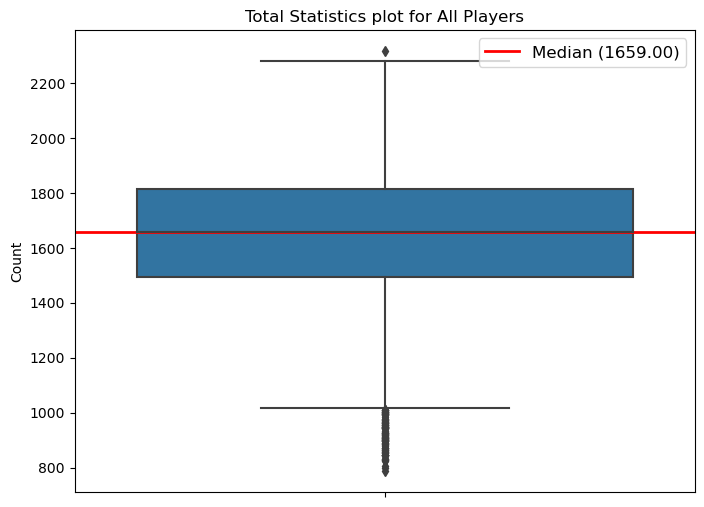

In [30]:
# Create a graph Tota/Base stats of all players

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))

sns.boxplot(y='Total Stats', data=fifa_chosen)

# Customize the plot
plt.title('Total Statistics plot for All Players')
plt.xlabel(None)
plt.ylabel('Count')

# Show the median
median = fifa_chosen['Total Stats'].median()
plt.axhline(median, color='red', linestyle='-', label=f'Median ({median:.2f})', linewidth=2)
plt.legend(fontsize=12, loc='upper right')


# Show the plot
plt.show()


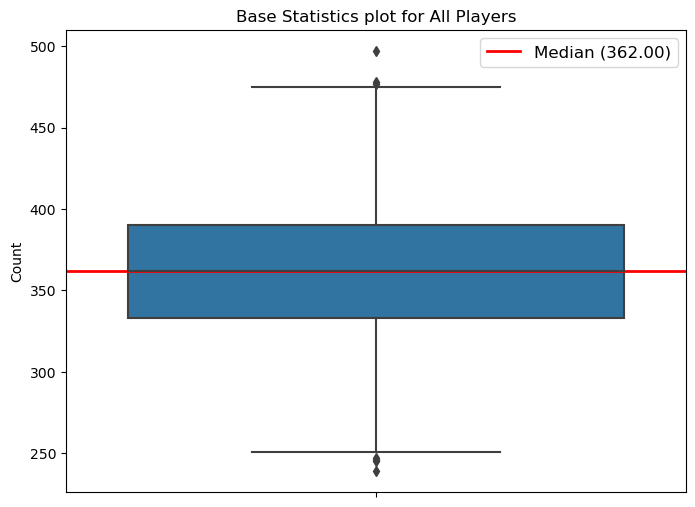

In [31]:
# Create a graph Tota/Base stats of all players

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))

sns.boxplot(y='Base Stats', data=fifa_chosen)

# Customize the plot
plt.title('Base Statistics plot for All Players')
plt.xlabel(None)
plt.ylabel('Count')

# Showing the median
median = fifa_chosen['Base Stats'].median()
plt.axhline(median, color='red', linestyle='-', label=f'Median ({median:.2f})', linewidth=2)
plt.legend(fontsize=12, loc='upper right')


# Show the plot
plt.show()


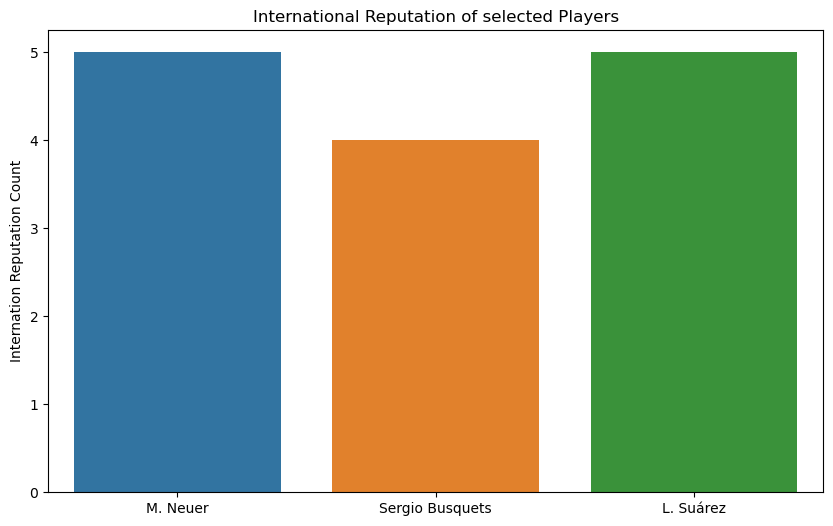

In [32]:
# Our model shows that "international_reputiation" is a variable that has a huge correlation with ova

# Create a graph that shows the "international_reputiation" value for our chosen player

# Filter the cleaned test df for the name of our players

fifa_test_chosen = fifa_test[(fifa_test['name'] == 'M. Neuer') | 
                        (fifa_test['name'] == 'L. Suárez') | 
                        (fifa_test['name'] == 'Sergio Busquets')]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='international_reputation', data=fifa_test_chosen)

# Customize the plot
plt.title('International Reputation of selected Players')
plt.xlabel(None)
plt.ylabel('Internation Reputation Count')

# Show the plot
plt.show()

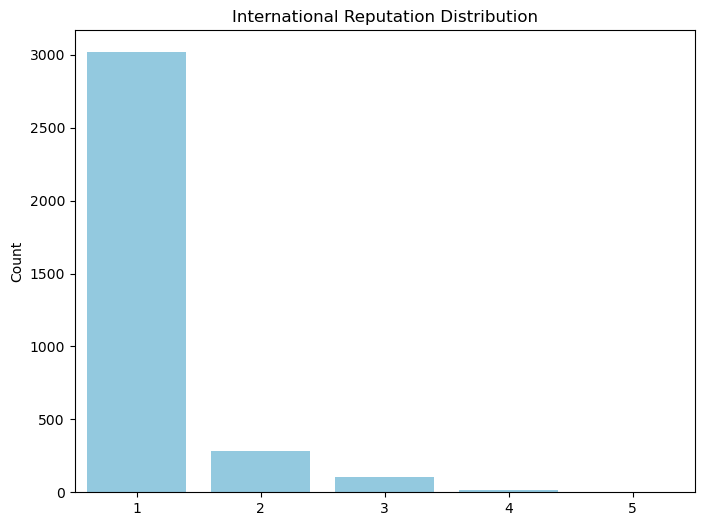

In [33]:
# Plot 'international_reputation' distribution count

plt.figure(figsize=(8, 6))
sns.countplot(data=fifa_test, x='international_reputation', color='skyblue')

# Customize the plot
plt.title('International Reputation Distribution')
plt.xlabel(None)
plt.ylabel('Count')

# Show the plot
plt.show()

In [34]:
fifa_test_ir = fifa_test[(fifa_test['international_reputation'] == 5)]
fifa_test_ir

# Very interesting! Just 2 players have a 5 score in IR -> and they are within the selected players!

,age,weight,growth,value,total_stats,base_stats,weak_foot,skill_moves,international_reputation,hits,gk,height_cm,mid_mean,ratio_stats,atk_att,def_att,name,nationality,club,bp,foot_Left,foot_Right,a/w_High,a/w_Low,a/w_Medium,d/w_High,d/w_Low,d/w_Medium,pred_ova
992,34,203.0,0,29000000.0,1515,497,4,1,5,222.0,87,193.04,46.0,0.33,42.266667,36.8,M. Neuer,Germany,FC Bayern München,GK,0,1,0,0,1,0,0,1,85
2347,33,190.0,0,31500000.0,2316,459,4,3,5,464.0,37,182.88,81.2,0.20,84.866667,65.5,L. Suárez,Uruguay,Atlético Madrid,ST,0,1,1,0,0,0,0,1,84


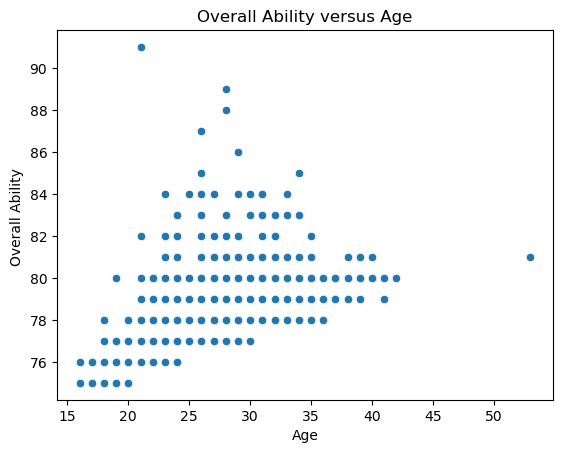

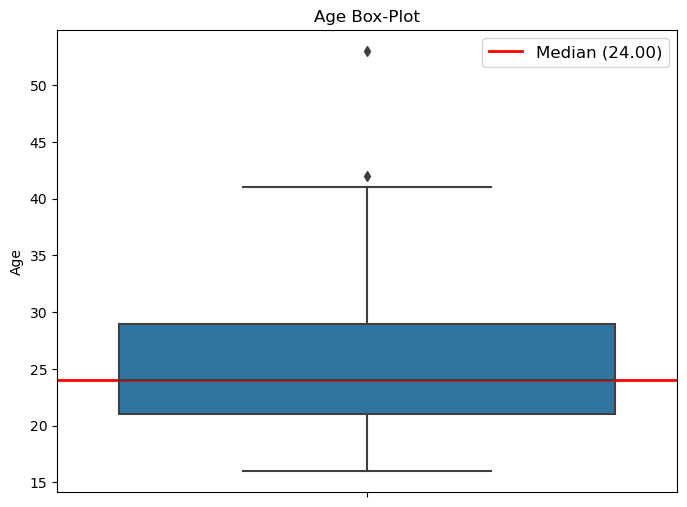

In [35]:
# Scatterplot Age vs Overall Ability

sns.scatterplot(x = "age", y = "pred_ova", data = fifa_test)
plt.xlabel("Age")
plt.ylabel("Overall Ability ")
plt.title("Overall Ability versus Age")
plt.show()

# Scatterplot Age vs Overall Ability
plt.figure(figsize=(8, 6))

sns.boxplot(y = fifa_test['age'], data=fifa_test)
plt.title("Age Box-Plot")
plt.ylabel('Age')

# Showing the median
median = fifa_test['age'].median()
plt.axhline(median, color='red', linestyle='-', label=f'Median ({median:.2f})', linewidth=2)
plt.legend(fontsize=12, loc='upper right')
plt.show()
